In [57]:
import scipy.integrate
import numpy
import matplotlib.pyplot
import os
import json
import scipy.interpolate
#for partial specialization
import cModel
import importlib
importlib.reload(cModel)
import time
import ivp
importlib.reload(ivp)
import runSolver
importlib.reload(runSolver)

#run solver
fh=os.path.expanduser('~')
setupFile=os.path.join(fh,'software','src','PBPK','setup','setupFast.json')
modelFile=os.path.join(fh,'software','src','PBPK','models','humanHG.json')
parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHG_parameters1.json')
runSolver.main([setupFile,modelFile,parameterFile],os.path.join(os.path.expanduser('~'),'temp'))


Calculating for hairPCBlood/5:(507, 16) [24664.976951005923]
Calculating for cardiacOutputScaled/11:(507, 16) [0.005367027600000001]
Calculating for kidneyFlowFraction/12:(507, 16) [0.00275625]
Calculating for richlyPerfusedFlowFraction/14:(507, 16) [0.0030140099999999997]
Calculating for fatFlowFraction/15:(507, 16) [0.00024335999999999995]
Calculating for slowlyPerfusedFlowFraction/17:(507, 16) [0.00558009]
Calculating for brainBloodFlowFraction/18:(507, 16) [0.00116964]
Calculating for liverInFlowFraction/21:(507, 16) [0.0002166784]
Calculating for liverOutFlowFraction/19:(507, 16) [0.00463761]
Calculating for gutFlowFraction/20:(507, 16) [0.0035676729]
Calculating for plasmaVolumeFraction/0:(507, 16) [1.1289600000000003e-05]
Calculating for redBloodCellsVolumeFraction/1:(507, 16) [3.6e-05]
Calculating for kidneyVolumeFraction/2:(507, 16) [1.44e-06]
Calculating for richlyPerfusedVolumeFraction/13:(507, 16) [0.0009]
Calculating for fatVolumeFraction/16:(507, 16) [0.004292870400000001

Calculating for hairPCBlood/5:(955, 16) [24664.976951005923]
Calculating for plasmaVolumeFraction/0:(955, 16) [1.1289600000000003e-05]
Calculating for redBloodCellsVolumeFraction/1:(955, 16) [3.6e-05]
Calculating for kidneyVolumeFraction/2:(955, 16) [1.44e-06]
Calculating for richlyPerfusedVolumeFraction/11:(955, 16) [0.0009]
Calculating for fatVolumeFraction/12:(955, 16) [0.004292870400000001]
Calculating for hairVolumeFraction/4:(955, 16) [1e-06]
Calculating for slowlyPerfusedVolumeFraction/3:(955, 16) [0.0031359999999999995]
Calculating for brainBloodVolumeFraction/6:(955, 16) [4.41e-06]
Calculating for brainVolumeFraction/7:(955, 16) [3.6e-05]
Calculating for liverVolumeFraction/8:(955, 16) [4.225e-05]
Calculating for gutVolumeFraction/10:(955, 16) [6.502500000000001e-06]
Calculating for intestineVolumeFraction/9:(955, 16) [0.0017640000000000002]
Done simultaneous LSODA SE


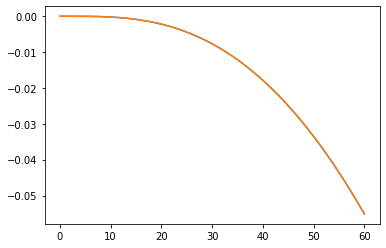

In [53]:
jobDir=os.path.join(fh,'temp')
sys=cModel.model()
#sys.parse(os.path.join(fh,'software','src','Integra','models','cDiazepam.json'))
setupFile=os.path.join(fh,'software','src','PBPK','setup','setupFast.json')
modelFile=os.path.join(fh,'software','src','PBPK','models','humanHG.json')
parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHG_parameters1.json')
model.parse(modelFile,parameterFile)
setup=runSolver.parseSetup(setupFile)
scale=runSolver.getScale(setup)
tmax=setup['tmax']*scale
t,sol,se,s1=ivp.solveSimultaneous(model,tmax,atol=setup['atol'],\
         rtol=setup['rtol'],method=setup['method'])

qt,sOut=runSolver.interpolate(setup,model,t,s1,tmax)
fOut=os.path.join(jobDir,'sOut.txt')
runSolver.write3D(fOut,sOut)
sOut1=runSolver.read3D(fOut)
assert numpy.all(sOut1 == sOut)
matplotlib.pyplot.plot(qt,sOut[:,1,1])
matplotlib.pyplot.plot(qt,sOut1[:,1,1])

***********done************
(16, 16)
22
Time: 0.714 s
[ 0.          0.          0.          0.          0.          0.
  0.          0.12434798 -0.00099998  0.          0.          0.
  0.          0.          0.          0.        ]


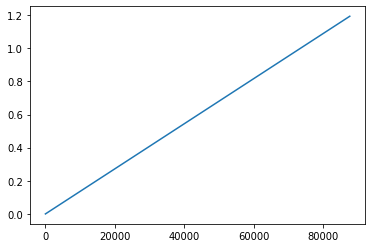

In [58]:
sys=cModel.model()
fh=os.path.expanduser('~')
#sys.parse(os.path.join(fh,'software','src','Integra','models','cDiazepam.json'))
setupFile=os.path.join(fh,'software','src','PBPK','setup','setupFast.json')
modelFile=os.path.join(fh,'software','src','PBPK','models','humanHG.json')
parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHG_parameters1.json')
sys.parse(modelFile,parameterFile)
setup=runSolver.parseSetup(setupFile)
tscale=runSolver.getScale(setup)

#sys.inspect()    

print("***********done************")
print(sys.M(1).shape)
#print(sys.fSS(2))
print(sys.m)

nt=setup['nt']
qtmax=24*60*365*10
qt=numpy.linspace(0,qtmax,nt)
#ft=[fw['derivatives']['fetusGrowthDuration'](x) for x in qt]
try:
    fw=sys.get('fetusWeight')
    ft=[fw['value'](x) for x in qt]
    matplotlib.pyplot.plot(qt/tscale,ft)
except (KeyError,TypeError):
    pass

try:
    hw=sys.get('hairVolume')
    ht=[10*hw['value'](x) for x in qt]
    matplotlib.pyplot.plot(qt/tscale,ht)
except (KeyError,TypeError):
    pass
start_time=time.time()
for i in range(100000):
    sys.M(1e7)
end_time=time.time()
print('Time: {:.3f} s'.format(end_time-start_time))
print(sys.M(1000)[8,:])

Calculating for hairPCBlood/0:(10645, 17) [24664.976951005923]
Calculating for hairVolumeFraction/1:(10645, 17) [8.925742052568391e-07]
Done simultaneous LSODA SE
Time: 11.279 s


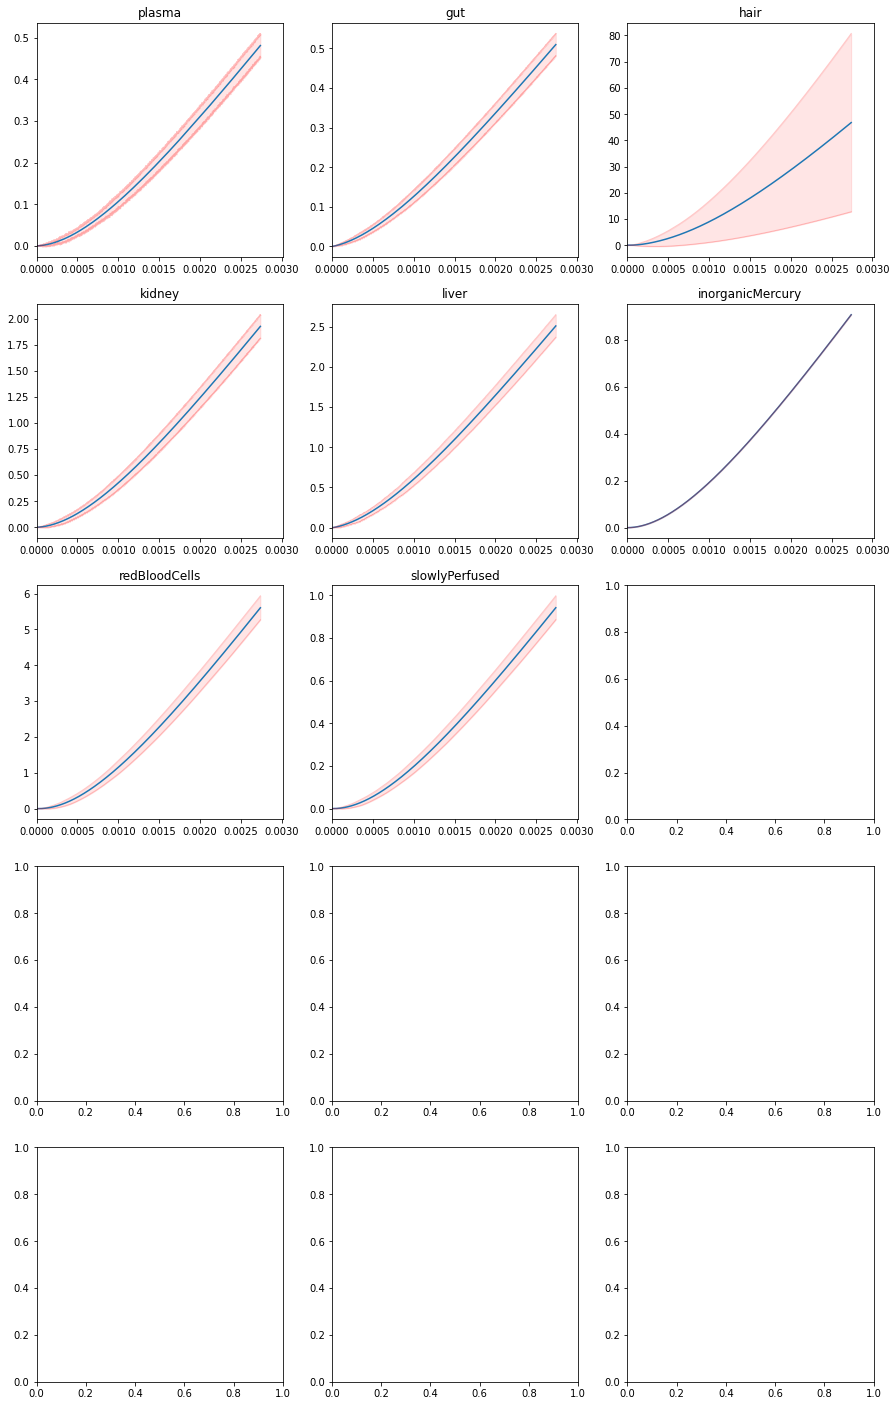

In [112]:
# #copy output of Thompson et al1
fig, axs = matplotlib.pyplot.subplots(5, 3,figsize=(15,25))
name=['arterial','adipose','brain','heart','kidney','liver','lung','muscle','skin',
      'splanchnic','stomach','testes','excrement']
name=['plasma','gut','hair','kidney','liver','inorganicMercury','redBloodCells','slowlyPerfused']

#diazepam
max=[1.5,2.6,3,4,5,2.5,6.8,1.5,1.5,4,4.2,3,25]
#cotinine
max=[9]*13
max[12]=90
max[2]=2


max=[1000*x for x in max]
for i in range(len(name)):
    row=i//3
    col=i%3
    fy=sol[:,sys.lut[name[i]]]
    fe=se[:,sys.lut[name[i]]]
    ax=axs[row,col]
    ax.plot(t/tscale,fy)
    ax.fill_between(t/tscale, fy-fe, fy + fe, color='red',alpha=0.1)
    ax.plot(t/tscale,fy-fe,color='red',linewidth=1,alpha=0.2)
    ax.plot(t/tscale,fy+fe,color='red',linewidth=1,alpha=0.2)
    axs[row,col].set_title(name[i])
    #axs[row,col].set_ylim([0,max[i]])
    axs[row,col].set_xlim([0,1.1*tmax/tscale])


7


7440

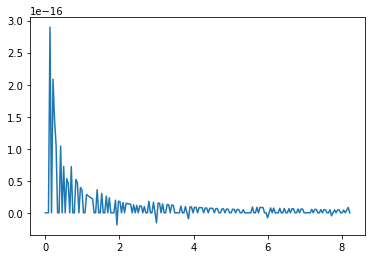

In [25]:
#gD=sys.get("hairGrowthDuration")
#print(gD['value']/60/24/365)
print(sys.lut['slowlyPerfused'])
ft=[sys.fSS(x)[0,8,7] for x in qt]
#matplotlib.pyplot.imshow(sys.fSS(3e6)[0])
matplotlib.pyplot.plot(qt/tscale,ft)
30*248